In [3]:
library(fgsea)
library(jsonlite)

get_scores = function(x) {
  scores = sign(x$logFC) * -log10(x$P.Value)
  names(scores) = x$genes
  sorted_scores = sort(scores, decreasing = TRUE)
  print(length(sorted_scores))
  print(length(unique(names(sorted_scores))))
  return(sorted_scores)
}

get_geneset = function(x) {
  return(unique(unlist(x[x$padj<0.05]$leadingEdge)))
}


In [4]:
# load pathways
paths = read.csv('../../processed_data/pm_kl_frame.csv', row.names=1)

paths = paths[paths$is_gene=='True',]
P = list()
for(i in unique(paths$cluster)){
    P[[paste0('PM.',as.character(i))]] = paths[paths$cluster==i,'description']
}      


In [5]:
degs = readRDS('../../processed_data/pseudobulk_degs_ExLayers.rds')

In [29]:
sc = read.csv('../../processed_data/all_scores_0825.csv', row.names = 1)

In [18]:
all_scores = {}
for(i in names(degs$degs_all)){
    temp = degs$degs_all[[i]]$res
    temp$genes = rownames(temp)
    scores = get_scores(temp)
    all_scores[[i]] = scores

}


[1] 10752
[1] 10752
[1] 10784
[1] 10784
[1] 11151
[1] 11151
[1] 10513
[1] 10513
[1] 9799
[1] 9799


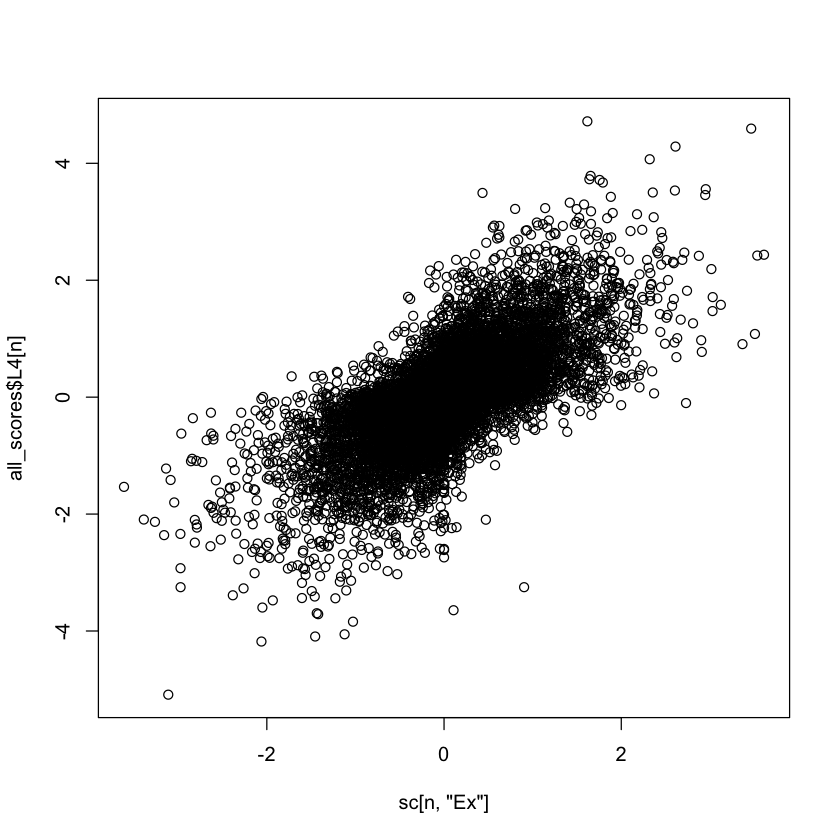

In [34]:
n = intersect(row.names(sc), names(all_scores$L4))


plot(sc[n,'Ex'], all_scores$L4[n])

In [51]:
d = c()
for(i in names(all_scores)){
    o = fgsea(pathways = P, stats = all_scores[[i]], minSize = 5, maxSize = 1000, nproc=1, nPermSimple=10000)
    o = o[order(o$pval,decreasing=T),]
    o$score = sign(o$NES) * -log10(o$pval)
    o$pathway = factor(o$pathway, levels = o$pathway)
    o$leadingEdge = NULL
    i_safe <- gsub("/", "_", i)
    d = c(d, i_safe)
    file_path <- file.path('..', '..', 'processed_data', paste0('fgsea_ex_layer_', i_safe, '.csv'))

    write.csv(as.data.frame(o[order(o$pval),]), file_path)
}


  |======================================================================| 100%

  |======================================================================| 100%

  |======================================================================| 100%

  |======================================================================| 100%

  |======================================================================| 100%



In [52]:
d

[1] "L4_L5" "L3"    "L5_6"  "L4"    "L2"